In [1]:
import sys
import numpy as np
sys.path.insert(0,'../..')
from pybandstructure.sample import *
import matplotlib.pyplot as plt
from os import remove
from pybandstructure.common import *
import numpy.linalg as lin

In [2]:
from pybandstructure.geometry.point_groups import *
basis_vectors = [[1,-0.5],
                 [0,0.5*np.sqrt(3)]]

denominator = 10
#point_group = D6_2D(theta0 = np.arctan2(basis_vectors[1][0], basis_vectors[0][0]))
point_group = Point_Group.dihedral_group(n=6, theta0 = np.arctan2(basis_vectors[1][0], basis_vectors[0][0]))

irr = Unit_Cell_Sample.irreducible_wigner_seitz_cell(basis_vectors = basis_vectors, 
                                                     denominator = denominator,
                                                     point_group = point_group)

#irr = Unit_Cell_Sample.wigner_seitz_cell(basis_vectors = basis_vectors, denominator = denominator)
#irr = Unit_Cell_Sample.default_unit_cell(basis_vectors = basis_vectors, denominator = denominator)

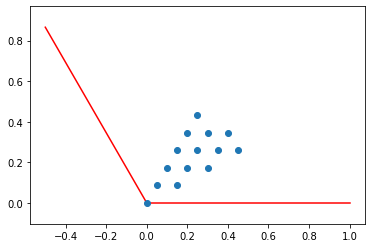

In [3]:
irr.plot()

In [4]:
irr((3,5))

{'index': 11, 'operation': 8, 'integer_part': (0, 0)}

In [5]:
def check(int_cords):
    print(irr(int_cords))
    index = irr(int_cords)['index']
    operation = irr(int_cords)['operation']
    integer_part = irr(int_cords)['integer_part']
    
    G = irr.basis_vectors @ np.array(integer_part)
    print(G)
    k = irr.coords[index]
    print(k)
    R = point_group.group_matrices[operation]
    print(R)
    assert np.allclose((R @ k) + G ,irr.basis_vectors @ (int_cords/irr.denominator).T)

In [10]:
check((12,0))

{'index': 2, 'operation': 5, 'integer_part': (1, 0)}
[1. 0.]
[0.1        0.17320508]
[[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]


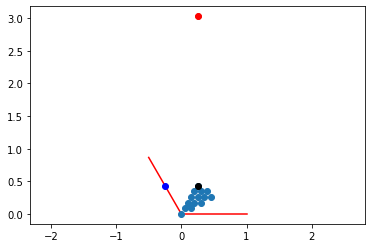

In [7]:
point = (20,35)
u = point_group.group_matrices[irr(point)['operation']] @ irr.get_coords(point) + irr.basis_vectors @ irr(point)['integer_part']
p = irr.get_coords(point)
p2 = point_group.group_matrices[irr(point)['operation']] @ irr.get_coords(point)
v = irr.basis_vectors @ (point/irr.denominator).T

irr.plot()
plt.plot(v[0],v[1],'go',ms = 5)
plt.plot(u[0],u[1],'ro')
plt.plot(p[0],p[1],'ko')
plt.plot(p2[0],p2[1],'bo')